In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#sys.path.insert(0, '../src')

In [ ]:
nc_data2 = pd.read_csv('../data/Hate_crime1/nc_data2_processed_data.csv')

label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','POPULATION_GROUP_CODE']:
    le = LabelEncoder()
    nc_data2[col] = le.fit_transform(nc_data2[col])
    label_encoders[col] = le

    # Define your features and target variable
X = nc_data2[['OFFENDER_RACE','BIAS_DESC', 'POPULATION_GROUP_CODE']]
y = nc_data2['SEVERITY']  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create and fit the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [5]:
tx_data2 = pd.read_csv('../data/Hate_crime1/tx_data2_processed_data.csv')

label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','POPULATION_GROUP_CODE']:
    le = LabelEncoder()
    tx_data2[col] = le.fit_transform(tx_data2[col])
    label_encoders[col] = le

    # Define your features and target variable
X1 = tx_data2[['OFFENDER_RACE','BIAS_DESC', 'POPULATION_GROUP_CODE']]
y1 = tx_data2['SEVERITY']  # Replace with your actual target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# # Create and fit the Multinomial Logistic Regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

In [6]:
tx_data2

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,14,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,1
1,4204,2411,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,1
2,4205,2412,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,1
3,4206,2413,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,1
4,4207,2414,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,1
8479,218043,1124581,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,1
8480,218044,1220182,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,1
8481,218045,1220183,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,1


In [ ]:
nc_data2

In [28]:
def calculate_percentage(x):
    return x.sum(nc_data2['INCIDENT_ID']) / x.sum(nc_data2['INCIDENT_ID']).sum(nc_data2['INCIDENT_ID']) * 100
    

In [26]:
x = calculate_percentage(nc_data2['INCIDENT_ID']).astype(int)

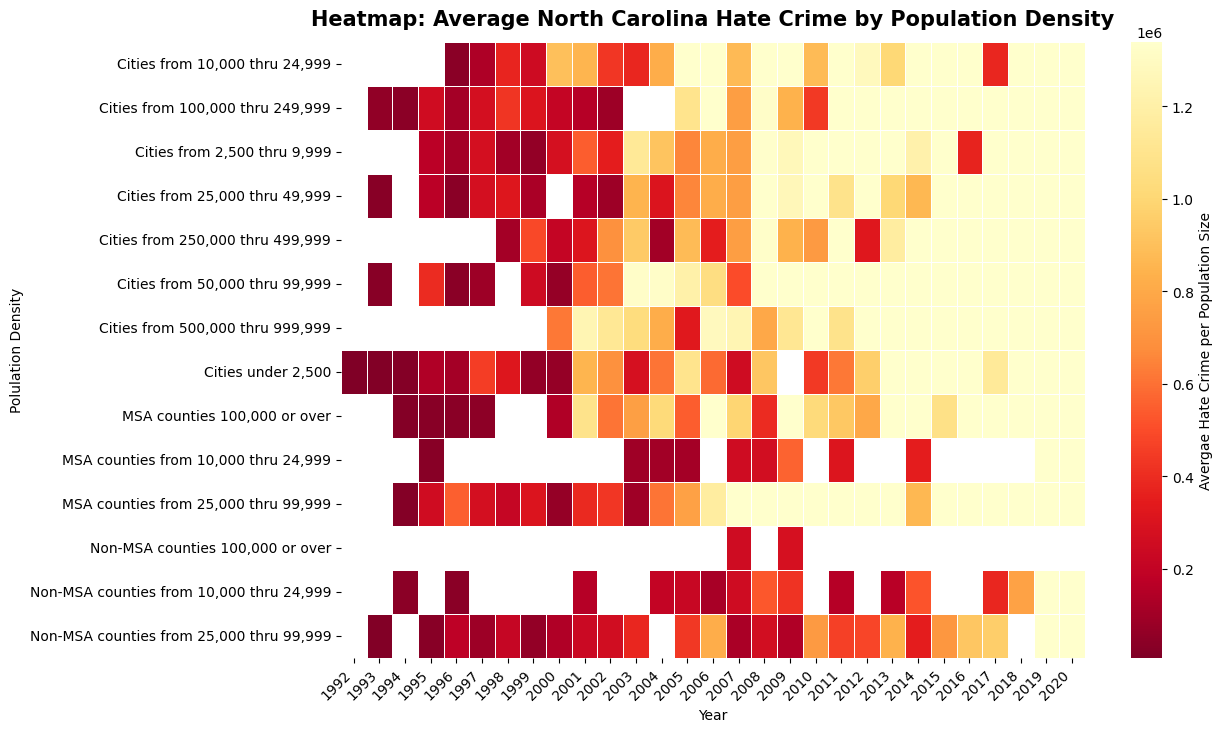

In [39]:
heatmap_data = nc_data2.pivot_table(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='INCIDENT_ID', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd_r', annot=False, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Avergae Hate Crime per Population Size'}, vmin=nc_data2['INCIDENT_ID'].min(), vmax=nc_data2['INCIDENT_ID'].max())
plt.xlabel('Year')
plt.ylabel('Polulation Density')
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap: Average North Carolina Hate Crime by Population Density', pad=12, fontsize=15, fontweight='bold')
plt.show()

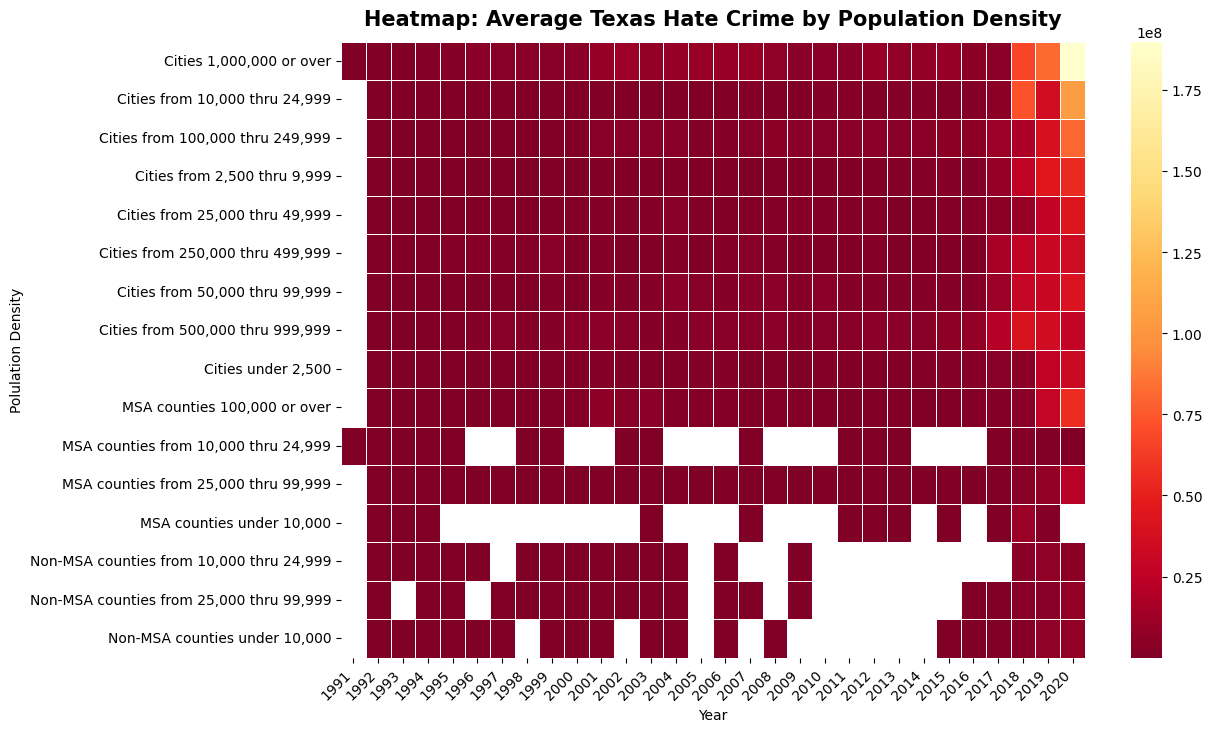

In [11]:
heatmap_data = tx_data2.pivot_table(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='INCIDENT_ID', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd_r', annot=False, fmt='.0f', linewidths=0.5)#, cbar_kws={'label': 'Avergae Hate Crime per Population Size'}, vmin=tx_data2['INCIDENT_ID'].min(), vmax=tx_data2['INCIDENT_ID'].max())
plt.xlabel('Year')
plt.ylabel('Polulation Density')
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap: Average Texas Hate Crime by Population Density', pad=12, fontsize=15, fontweight='bold')
plt.show()